# Diabetes Health Indicators Dataset Notebook

## Purpose
The purpose of this code notebook is to clean BRFSS data into a useable format for machine learning alogrithms. 
The dataset originally has 330 features (columns), but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions, only select features are included in this analysis.


#### Important Risk Factors
Research in the field has identified the following as **important risk factors** for diabetes and other chronic illnesses like heart disease (not in strict order of importance):

*   blood pressure (high)
*   cholesterol (high)
*   smoking
*   diabetes
*   obesity
*   age
*   sex
*   race
*   diet
*   exercise
*   alcohol consumption
*   BMI
*   Household Income
*   Marital Status
*   Sleep
*   Time since last checkup
*   Education
*   Health care coverage
*   Mental Health


**Independent Variables:**

**High Blood Pressure**
*   Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> _RFHYPE5

**High Cholesterol**
*   Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> TOLDHI2
*   Cholesterol check within past five years --> _CHOLCHK

**BMI**
*   Body Mass Index (BMI) --> _BMI5

**Smoking**
*   Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> SMOKE100

**Other Chronic Health Conditions**
*   (Ever told) you had a stroke. --> CVDSTRK3
*   Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) --> _MICHD

**Physical Activity**
*   Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> _TOTINDA

**Diet**
*   Consume Fruit 1 or more times per day --> _FRTLT1
*   Consume Vegetables 1 or more times per day --> _VEGLT1

**Alcohol Consumption**
*   Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> _RFDRHV5

**Health Care**
*   Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?  --> HLTHPLN1
*   Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> MEDCOST

**Health General and Mental Health**
*   Would you say that in general your health is: --> GENHLTH
*   Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MENTHLTH
*   Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PHYSHLTH
*   Do you have serious difficulty walking or climbing stairs? --> DIFFWALK

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pip install keras_tuner

In [2]:
import keras_tuner as k
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential # creates network in sequential form
from keras.layers import Dense   # creates fully connected layers
from keras.layers import Dropout, BatchNormalization, Input
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from keras.regularizers import L1,L2,L1L2
from keras.initializers import Zeros,ones,GlorotNormal,GlorotUniform,HeNormal,HeUniform,RandomNormal,RandomUniform  # w.t's initializers


Using TensorFlow backend


In [22]:
df = pd.read_csv(r"C:\Users\Utteja\Downloads\Data science innomatics\DEEP_LEARNING\D_L_PROJECTS\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [23]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [25]:
df["Diabetes_binary"].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [26]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [27]:
df.duplicated().sum()

1635

In [28]:
df.drop_duplicates(inplace = True)

In [29]:
df.duplicated().sum()

0

In [30]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [31]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [32]:
print(df["Diabetes_binary"].unique())
print(df["HighBP"].unique())
print(df["HighChol"].unique())
print(df["CholCheck"].unique())
print(df["BMI"].unique())  # varies
print(df["Smoker"].unique())
print(df["Stroke"].unique())
print(df["HeartDiseaseorAttack"].unique())
print(df["PhysActivity"].unique())
print(df["Fruits"].unique())
print(df["Veggies"].unique())
print(df["HvyAlcoholConsump"].unique())
print(df["AnyHealthcare"].unique())
print(df["NoDocbcCost"].unique())
print(df["GenHlth"].unique())    # varies
print(df["MentHlth"].unique())   # varies
print(df["PhysHlth"].unique())  # varies
print(df["DiffWalk"].unique())
print(df["Sex"].unique())
print(df["Age"].unique())  # varies
print(df["Education"].unique()) # varies
print(df["Income"].unique())   # varies

[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[3. 1. 2. 4. 5.]
[ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
[30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]
[0. 1.]
[1. 0.]
[ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
[6. 5. 4. 3. 2. 1.]
[8. 7. 6. 3. 4. 1. 5. 2.]


In [33]:
df["Diabetes_binary"].astype(int)

df["HighBP"].astype(int)
df["HighChol"].astype(int)
df["CholCheck"].astype(int)
df["BMI"].astype(int)  # varies
df["Smoker"].astype(int)
df["Stroke"].astype(int)
df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"].astype(int)
df["Fruits"].astype(int)
df["Veggies"].astype(int)
df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"].astype(int)
df["NoDocbcCost"].astype(int)
df["GenHlth"].astype(int)   # varies
df["MentHlth"].astype(int)   # varies
df["PhysHlth"].astype(int) # varies
df["DiffWalk"].astype(int)
df["Sex"].astype(int)
df["Age"].astype(int) # varies
df["Education"].astype(int) # varies
df["Income"].astype(int)   # varies

0        8
1        8
2        8
3        8
4        8
        ..
70687    1
70688    6
70689    4
70690    4
70691    2
Name: Income, Length: 69057, dtype: int32

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth           

Text(0.5, 1.0, 'Missing Values per Feature')

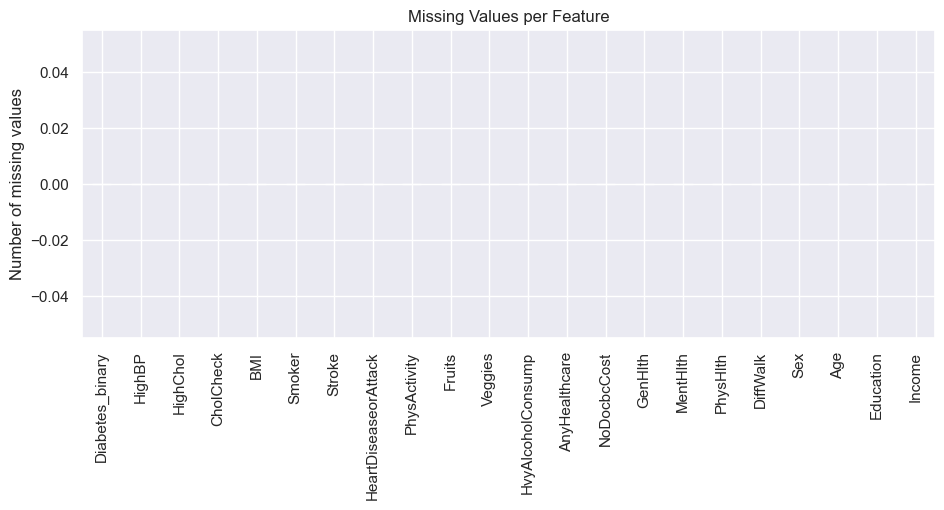

In [35]:
# the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature')

In [36]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

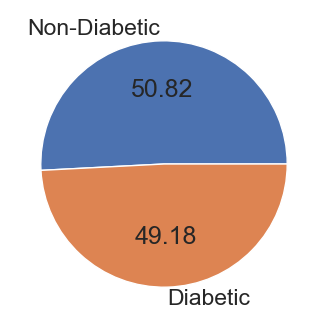

In [38]:
# Obtain value counts of patients with diabetes
labels=["Non-Diabetic","Diabetic"]
plt.pie(df["Diabetes_binary"].value_counts(), labels =labels ,autopct='%.02f');

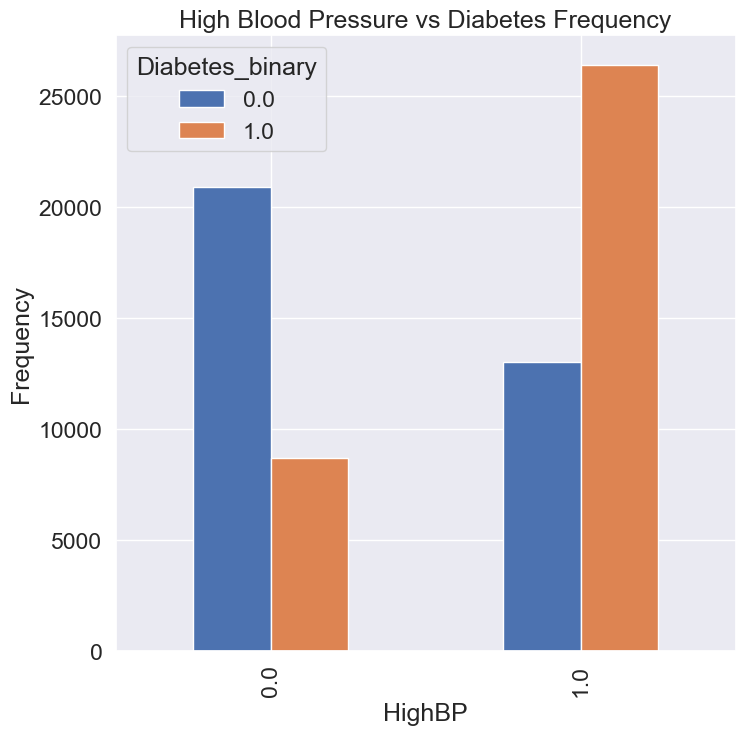

In [41]:
# Checking the relation with HighBP and Diabetes_binary
pd.crosstab(df.HighBP,df.Diabetes_binary).plot(kind="bar",figsize=(8,8))

plt.title('High Blood Pressure vs Diabetes Frequency')
plt.xlabel('HighBP')
plt.ylabel('Frequency')
plt.show()

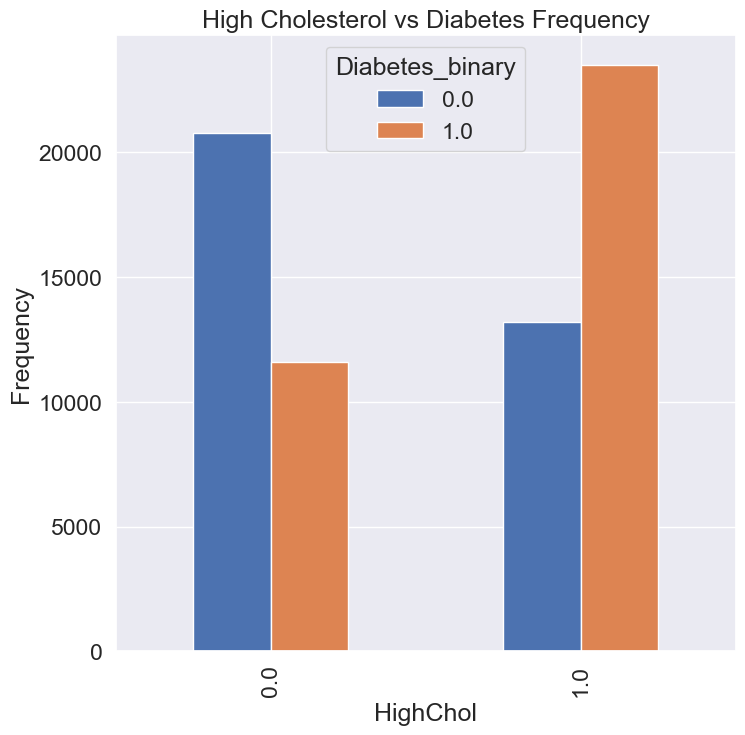

In [42]:
pd.crosstab(df.HighChol,df.Diabetes_binary).plot(kind='bar', figsize=(8,8))

plt.title('High Cholesterol vs Diabetes Frequency')
plt.xlabel('HighChol')
plt.ylabel('Frequency')
plt.show()

(15.0, 60.0)

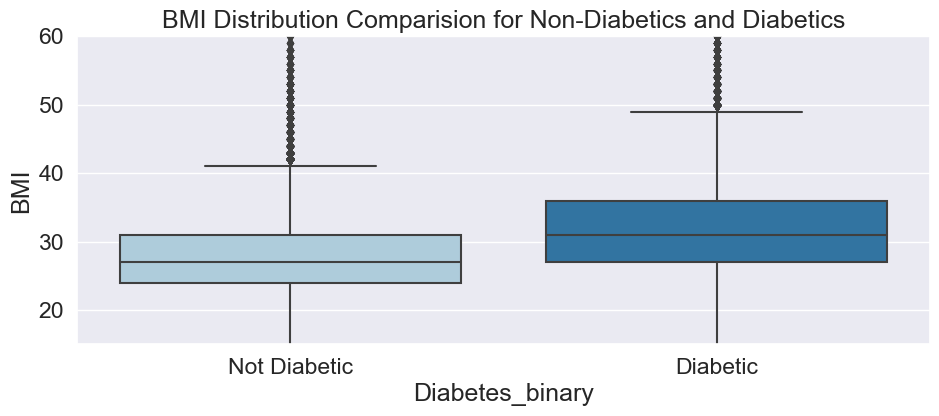

In [43]:
# Check the distribution and outlier positioning in BMI
ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
ax.set(title = 'BMI Distribution Comparision for Non-Diabetics and Diabetics')
ax.set_xticklabels(['Not Diabetic', 'Diabetic'])
plt.ylim(15, 60)

<AxesSubplot:xlabel='Age', ylabel='Count'>

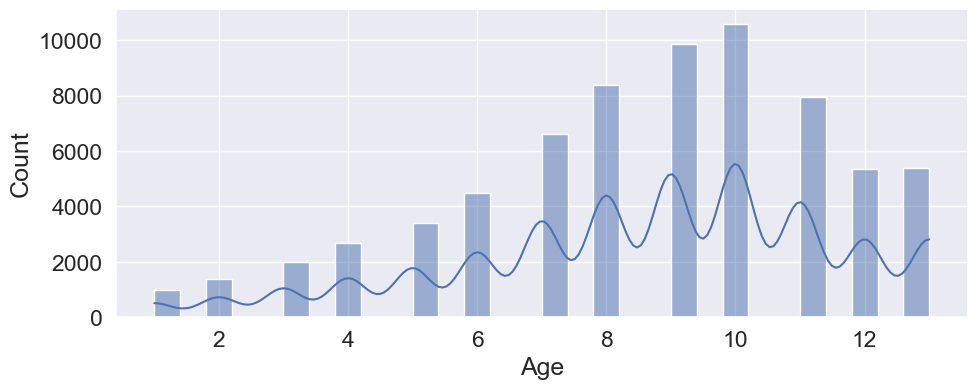

In [46]:
sns.histplot(data = df, x = "Age", bins = 30, kde = True)

<AxesSubplot:xlabel='Education', ylabel='count'>

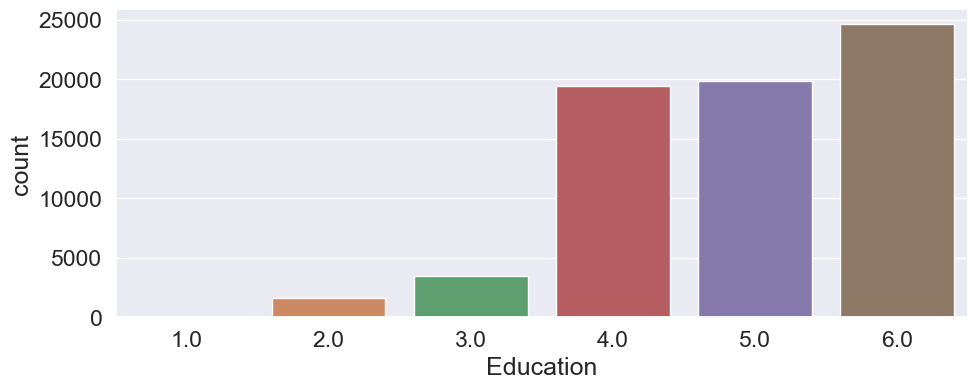

In [50]:
sns.countplot(data = df, x = "Education")

C:\Users\Utteja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

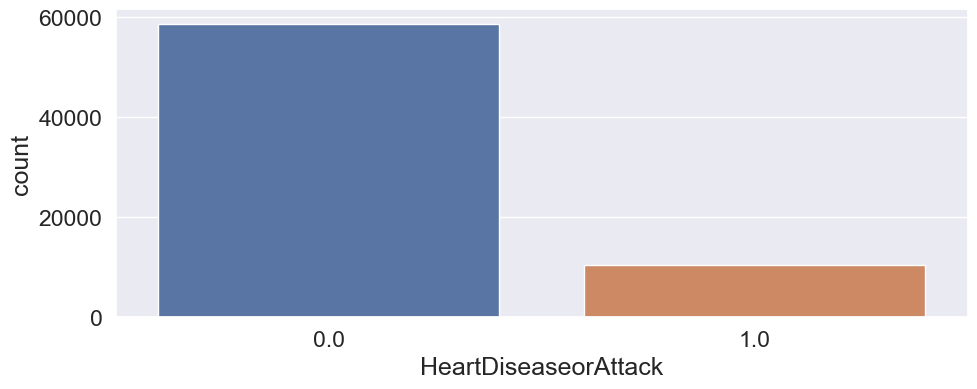

In [52]:
sns.countplot(df["HeartDiseaseorAttack"])

<AxesSubplot:xlabel='HeartDiseaseorAttack'>

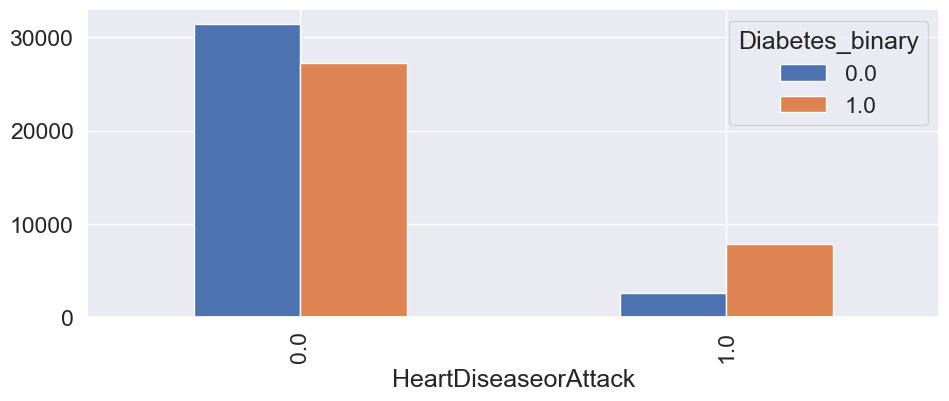

In [57]:
df.pivot_table(index = ["HeartDiseaseorAttack"], columns = ["Diabetes_binary"], aggfunc = "size").plot(kind = "bar")

In [44]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Text(0.5, 1.0, 'Diabetes Variable Correlations')

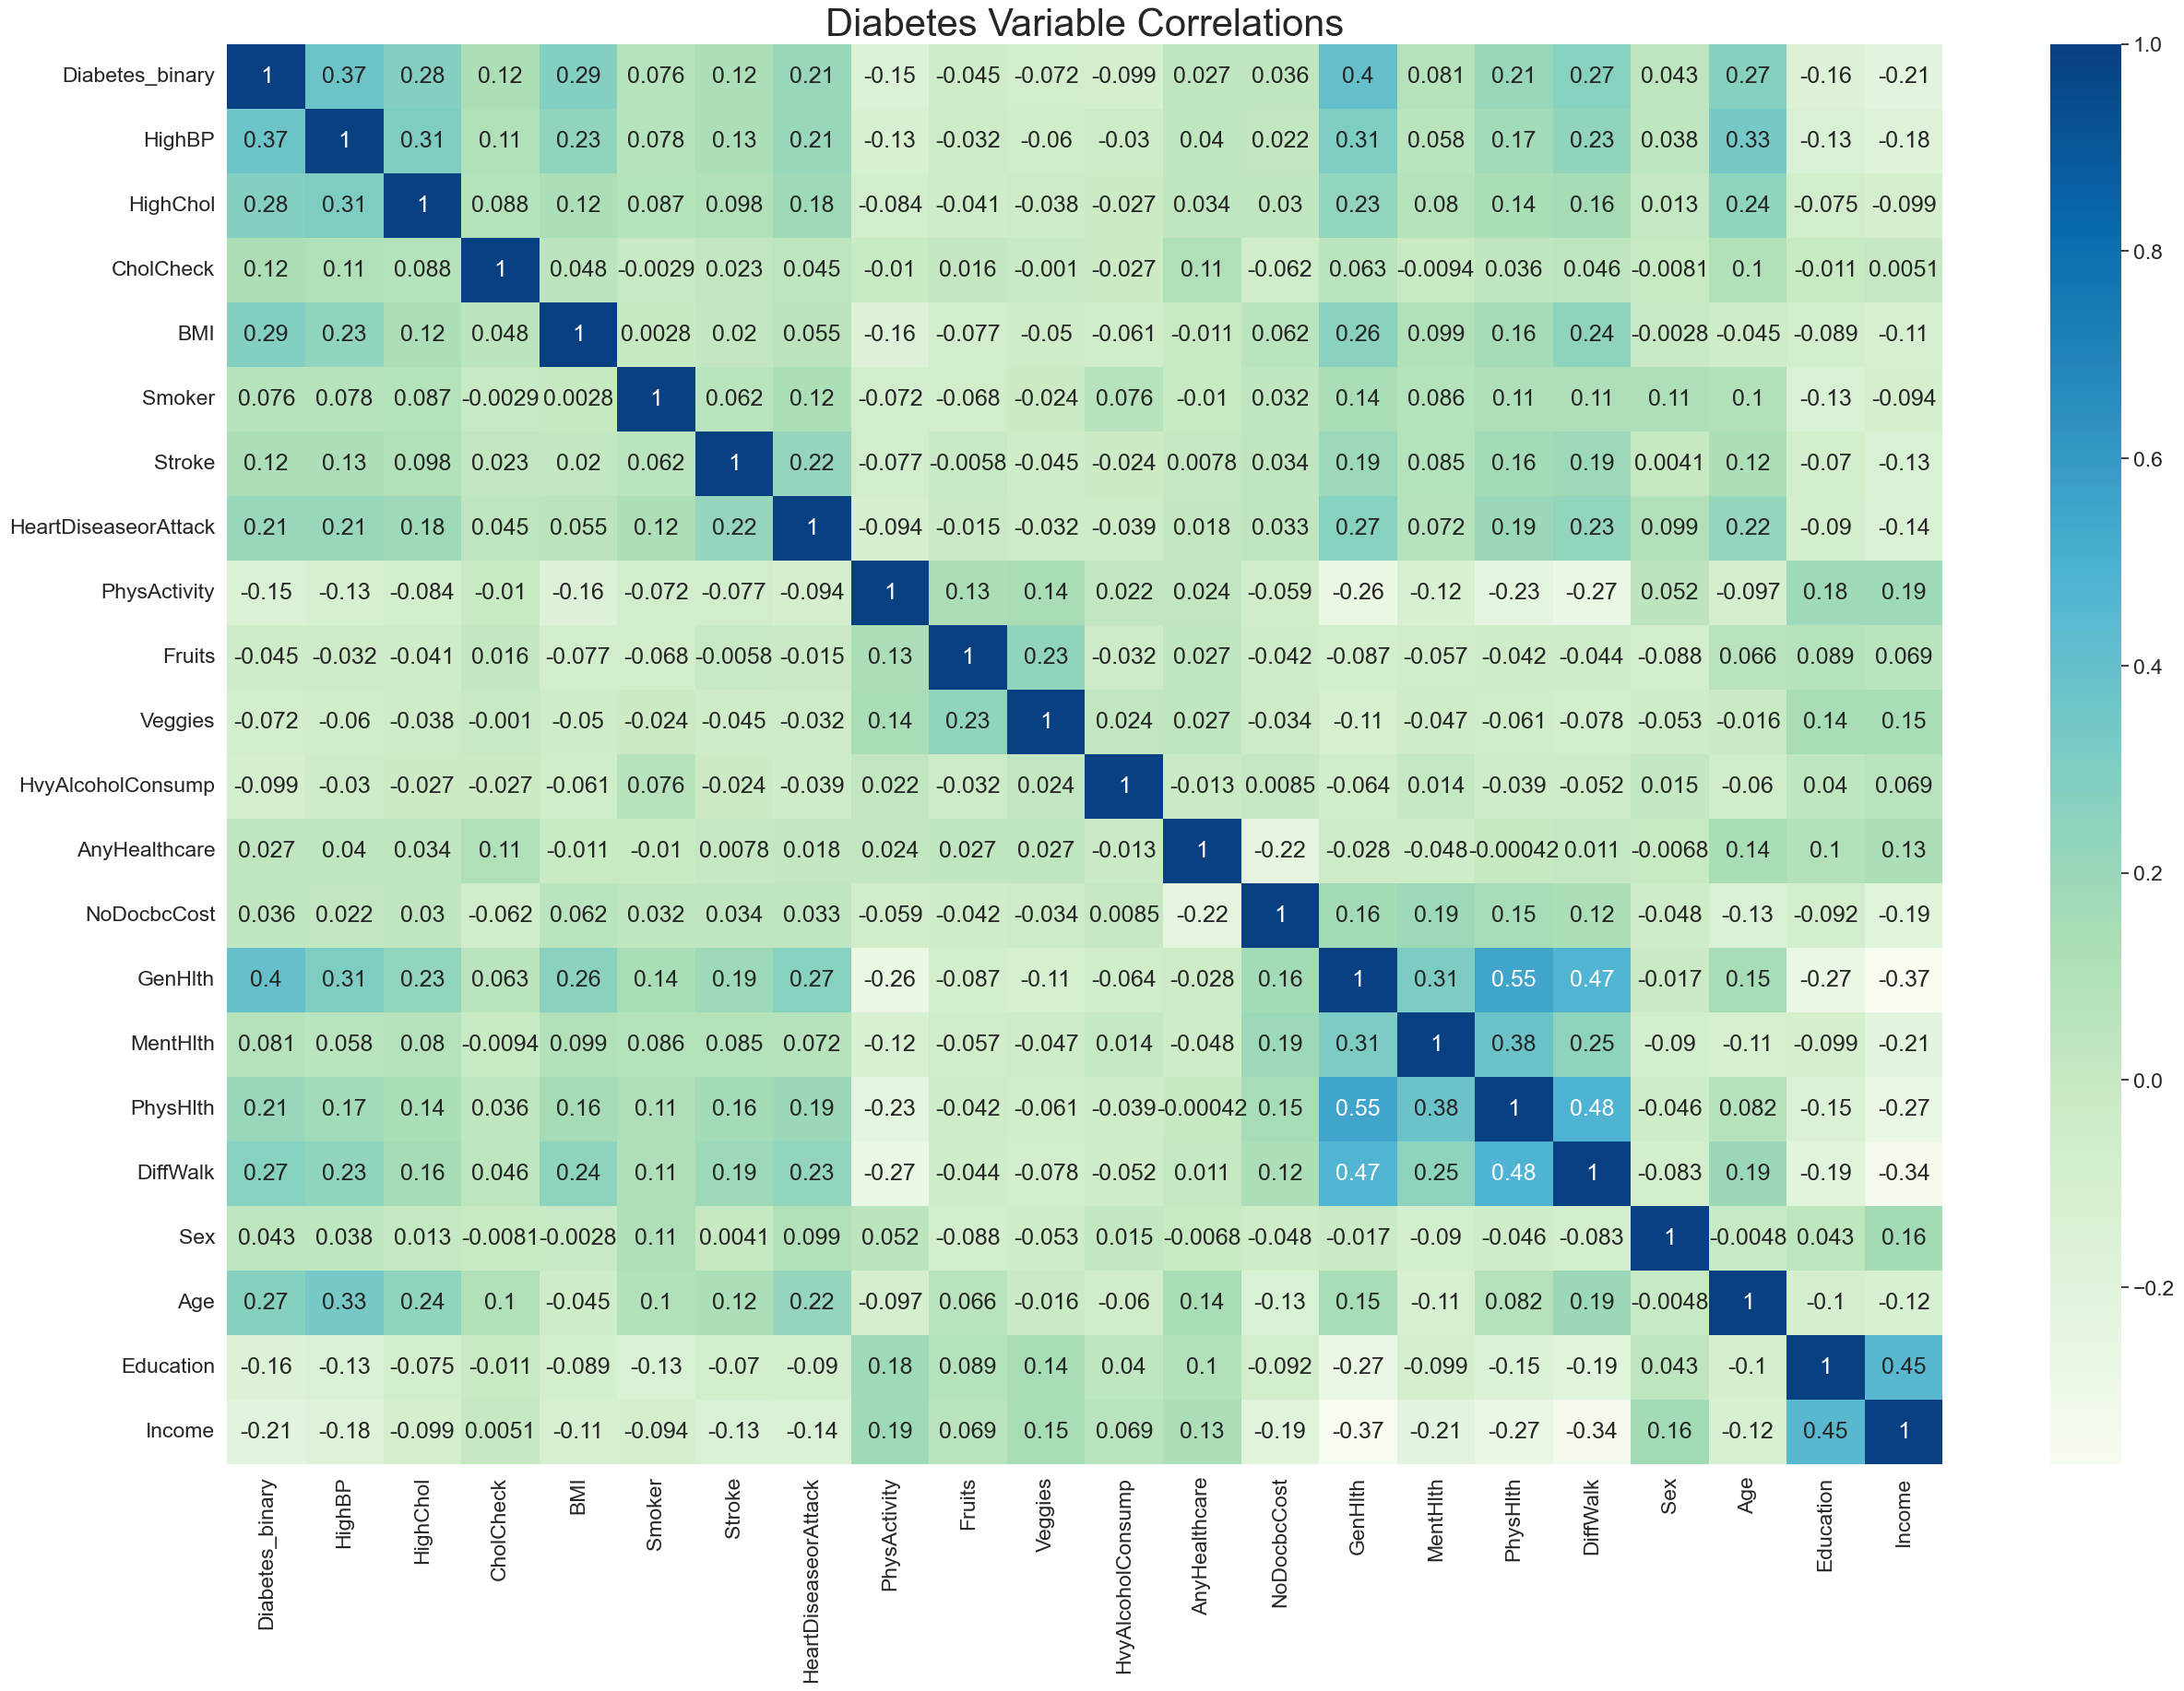

In [37]:
# Check correlation using a heatmap
plt.figure(figsize = (30,20))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),annot=True, cmap='GnBu')
plt.title("Diabetes Variable Correlations",fontsize=30)

In [19]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [20]:
x = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]
y = df["Diabetes_binary"]

In [21]:
x.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [22]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 0)

In [24]:
x_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
55188,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,5.0
62728,1.0,1.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,4.0,3.0,14.0,0.0,0.0,5.0,5.0,1.0
21707,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,30.0,0.0,0.0,8.0,6.0,8.0
54199,0.0,0.0,1.0,41.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,5.0,7.0
43065,1.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,13.0,6.0,7.0


In [25]:
y.value_counts()

1.0    35097
0.0    33960
Name: Diabetes_binary, dtype: int64

In [26]:
x_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
63018,0.0,0.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,5.0,30.0,30.0,0.0,1.0,13.0,4.0,6.0
41555,1.0,1.0,1.0,55.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,3.0,14.0,20.0,1.0,0.0,7.0,4.0,1.0
55288,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,2.0,1.0,0.0,0.0,7.0,6.0,7.0
63915,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,4.0
38,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,5.0,8.0


In [27]:
print(x_train.shape, y_train.shape)

(48339, 21) (48339,)


In [28]:
y_train.value_counts()

1.0    24442
0.0    23897
Name: Diabetes_binary, dtype: int64

In [30]:
pip install -U threadpoolctl

In [29]:
import imblearn

from imblearn.over_sampling import SMOTE

In [30]:
s = SMOTE()

In [31]:
x_train,y_train = s.fit_resample(x_train,y_train)

In [32]:
print(x_train.shape, y_train.shape)

(48884, 21) (48884,)


In [33]:
y_train.value_counts()

1.0    24442
0.0    24442
Name: Diabetes_binary, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)

In [35]:
x_test=std.transform(x_test )

In [36]:
x_train.shape

(48884, 21)

In [81]:
# 1st step

def modelss(hp):      # hp is hyper parameter
    model = Sequential()
    model.add(Input(shape = (21,)))

    for i in range(hp.Int("hidden_layers", min_value = 5, max_value = 20)):
        model.add(Dense(units = hp.Int("neurons{}".format(i), min_value = 4, max_value = 50),activation= "relu"))

    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer=hp.Choice("optimizer", values = ["sgd","adam","adadelta","rmsprop"]),loss="binary_crossentropy",metrics=["accuracy"])
    
    return model
    

In [82]:
tuner = k.RandomSearch(modelss, objective = "val_accuracy", max_trials = 5, directory = r"C:\Users\Utteja\Downloads\Data science innomatics\DEEP_LEARNING\D_L_PROJECTS\randomness", project_name = "f4")   # obj--> used for maximise or minimize our loss

In [83]:
# 3rd step

tuner.search(x_train, y_train, epochs = 26, validation_data = (x_test, y_test))  # 12 trials means = 12 models

Trial 5 Complete [00h 02m 33s]
val_accuracy: 0.7130997180938721

Best val_accuracy So Far: 0.7478038668632507
Total elapsed time: 00h 12m 36s


In [85]:
tuner.search_space_summary()

Search space summary
Default search space size: 19
hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam', 'adadelta', 'rmsprop'], 'ordered': False}
neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 50, 'step': 1, 'sampling': 'linear'}
n

In [86]:
tuner.results_summary()

Results summary
Results in C:\Users\Utteja\Downloads\Data science innomatics\DEEP_LEARNING\D_L_PROJECTS\randomness\f4
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
hidden_layers: 7
neurons0: 17
neurons1: 14
neurons2: 11
neurons3: 9
neurons4: 22
optimizer: rmsprop
neurons5: 11
neurons6: 32
neurons7: 14
neurons8: 30
neurons9: 33
neurons10: 20
neurons11: 44
neurons12: 9
neurons13: 42
neurons14: 28
neurons15: 48
neurons16: 37
Score: 0.7478038668632507

Trial 3 summary
Hyperparameters:
hidden_layers: 7
neurons0: 38
neurons1: 5
neurons2: 42
neurons3: 31
neurons4: 18
optimizer: rmsprop
neurons5: 47
neurons6: 29
neurons7: 11
neurons8: 23
neurons9: 13
neurons10: 48
neurons11: 22
neurons12: 30
neurons13: 50
neurons14: 35
neurons15: 20
neurons16: 38
Score: 0.7468867897987366

Trial 4 summary
Hyperparameters:
hidden_layers: 8
neurons0: 48
neurons1: 42
neurons2: 26
neurons3: 7
neurons4: 47
optimizer: adadelta
neurons5: 38
neurons6: 41
neuro

In [87]:
tuner.get_best_hyperparameters()[0].values

{'hidden_layers': 7,
 'neurons0': 17,
 'neurons1': 14,
 'neurons2': 11,
 'neurons3': 9,
 'neurons4': 22,
 'optimizer': 'rmsprop',
 'neurons5': 11,
 'neurons6': 32,
 'neurons7': 14,
 'neurons8': 30,
 'neurons9': 33,
 'neurons10': 20,
 'neurons11': 44,
 'neurons12': 9,
 'neurons13': 42,
 'neurons14': 28,
 'neurons15': 48,
 'neurons16': 37}

In [88]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [89]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                374       
                                                                 
 dense_1 (Dense)             (None, 14)                252       
                                                                 
 dense_2 (Dense)             (None, 11)                165       
                                                                 
 dense_3 (Dense)             (None, 9)                 108       
                                                                 
 dense_4 (Dense)             (None, 22)                220       
                                                                 
 dense_5 (Dense)             (None, 11)                253       
                                                                 
 dense_6 (Dense)             (None, 32)                3

In [90]:
hist = fmodel.fit(x_train, y_train, epochs = 30, batch_size = 10 ,validation_split= 0.1)

Epoch 1/30
4400/4400 [==============================] - 14s 3ms/step - loss: 0.5088 - accuracy: 0.7529 - val_loss: 0.5120 - val_accuracy: 0.7443
Epoch 2/30
4400/4400 [==============================] - 12s 3ms/step - loss: 0.5105 - accuracy: 0.7535 - val_loss: 0.5090 - val_accuracy: 0.7427
Epoch 3/30
4400/4400 [==============================] - 12s 3ms/step - loss: 0.5107 - accuracy: 0.7535 - val_loss: 0.5106 - val_accuracy: 0.7453
Epoch 4/30
4400/4400 [==============================] - 12s 3ms/step - loss: 0.5113 - accuracy: 0.7532 - val_loss: 0.5128 - val_accuracy: 0.7466
Epoch 5/30
4400/4400 [==============================] - 12s 3ms/step - loss: 0.5106 - accuracy: 0.7541 - val_loss: 0.5177 - val_accuracy: 0.7433
Epoch 6/30
4400/4400 [==============================] - 12s 3ms/step - loss: 0.5107 - accuracy: 0.7543 - val_loss: 0.5173 - val_accuracy: 0.7468
Epoch 7/30
4400/4400 [==============================] - 12s 3ms/step - loss: 0.5125 - accuracy: 0.7544 - val_loss: 0.5129 - val_ac

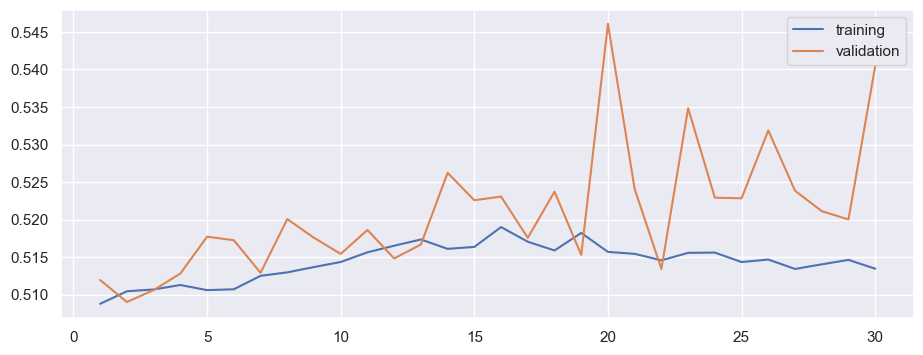

In [91]:
plt.plot(range(1,31),hist.history["loss"],label="training")
plt.plot(range(1,31),hist.history["val_loss"],label="validation")
plt.legend()

In [92]:
hist.history["val_loss"]

[0.5119622349739075,
 0.5090391039848328,
 0.5106289386749268,
 0.5128358006477356,
 0.5177359580993652,
 0.5172673463821411,
 0.512927770614624,
 0.5200769305229187,
 0.5175886750221252,
 0.5154464244842529,
 0.5186330676078796,
 0.5148404836654663,
 0.5166956782341003,
 0.5262445211410522,
 0.5225845575332642,
 0.5230815410614014,
 0.517581045627594,
 0.5237289071083069,
 0.5153178572654724,
 0.5460796356201172,
 0.5240848064422607,
 0.5134336948394775,
 0.5348389744758606,
 0.5229294896125793,
 0.5228471755981445,
 0.5318822860717773,
 0.5238606333732605,
 0.521136999130249,
 0.5200300812721252,
 0.5404481887817383]

In [93]:
predicted = fmodel.predict(x_test)

648/648 [==============================] - 1s 2ms/step


In [94]:
predicted = np.where(predicted>0.5,1,0)

In [95]:
print("accuracy", accuracy_score(y_test, predicted))

accuracy 0.7448595424268751


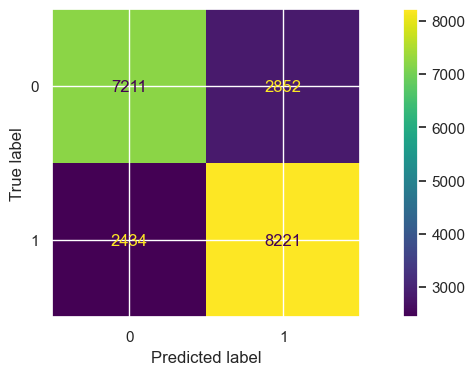

In [96]:
cm = confusion_matrix(y_test, predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()